In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
caminho = "dados/chagas_all_features.xlsx"
df = pd.read_excel(caminho)
df.head()

,ID,Name,Filename,Date Holter,Time,Sex,Nat,Event (FU-5 years),Age,Obito_MS,...,std_HRV_SampEn,std_HRV_ShanEn,std_HRV_FuzzyEn,std_HRV_MSEn,std_HRV_CMSEn,std_HRV_RCMSEn,std_HRV_CD,std_HRV_HFD,std_HRV_KFD,std_HRV_LZC
0,1,Adão Severo de Souza,004.dat,2013-05-22,5.00,1,PI,0,62,0,...,0.341141,0.447617,0.263273,0.218914,0.080374,0.225094,0.225071,0.153434,0.801302,0.195017
1,2,Adélia Francelina Alves,007.dat,2010-07-08,3.58,0,PE,1,58,1,...,0.283232,0.252348,0.201761,0.182576,0.042334,0.248976,0.231543,0.017618,1.369945,0.070903
2,3,Adguimar Freitas Borges,418.dat,2012-10-15,5.00,1,MG,0,60,0,...,0.230405,0.354242,0.177857,0.192890,0.050723,0.149796,0.165257,0.079671,0.426130,0.137788
3,4,Agripino Pereira de Lima,014.dat,2005-01-10,1.18,1,PE,1,51,1,...,0.366578,0.347698,0.217998,0.267325,0.105175,0.263425,0.226735,0.056150,0.397031,0.144029
4,5,Alexandre Ferreira Silva,018.dat,2012-10-10,5.00,1,RJ,0,53,0,...,0.550488,0.434322,0.389450,0.389798,0.371131,0.580026,0.525078,0.070432,0.897140,0.183412


In [4]:
df.isnull().sum().sum()

np.int64(0)

In [5]:
df.shape

(176, 254)


Distribuição de Sexo
Sex
0    101
1     75
Name: count, dtype: int64


C:\Users\adria\AppData\Local\Temp\ipykernel_40108\1233334303.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='viridis')


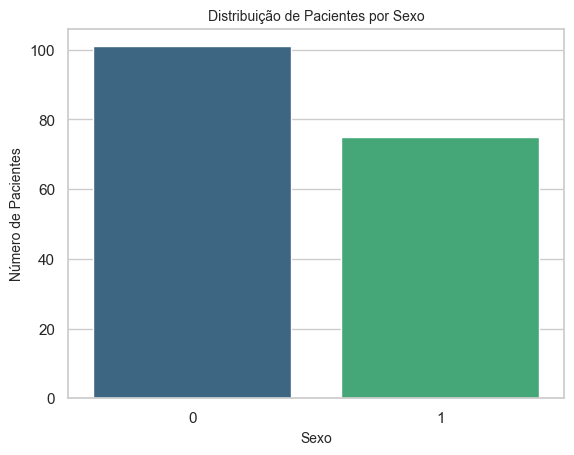

In [6]:
sns.set_theme(style="whitegrid")

print("\nDistribuição de Sexo")
print(df['Sex'].value_counts())

plt.figure()
sns.countplot(x='Sex', data=df, palette='viridis')
plt.title('Distribuição de Pacientes por Sexo', fontsize=10)
plt.xlabel('Sexo', fontsize=10)
plt.ylabel('Número de Pacientes', fontsize=10)
plt.show()


Análise: Distribuição das Classes
Obito_MS_FU-5 years
0    117
1     59
Name: count, dtype: int64


C:\Users\adria\AppData\Local\Temp\ipykernel_40108\3020677748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Obito_MS_FU-5 years', data=df, palette='plasma', order=df['Obito_MS_FU-5 years'].value_counts().index)


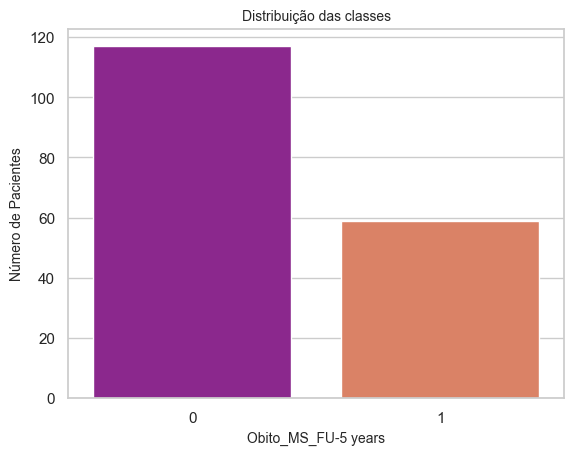

In [7]:
print("\nAnálise: Distribuição das Classes")
print(df['Obito_MS_FU-5 years'].value_counts())

plt.figure()
sns.countplot(x='Obito_MS_FU-5 years', data=df, palette='plasma', order=df['Obito_MS_FU-5 years'].value_counts().index)
plt.title('Distribuição das classes', fontsize=10)
plt.xlabel('Obito_MS_FU-5 years', fontsize=10)
plt.ylabel('Número de Pacientes', fontsize=10)
plt.show()


Análise: 'Event (FU-5 years)' vs 'Obito_MS'
Tabela de Contingência:
Obito_MS              0   1
Event (FU-5 years)         
0                   106   9
1                     2  59


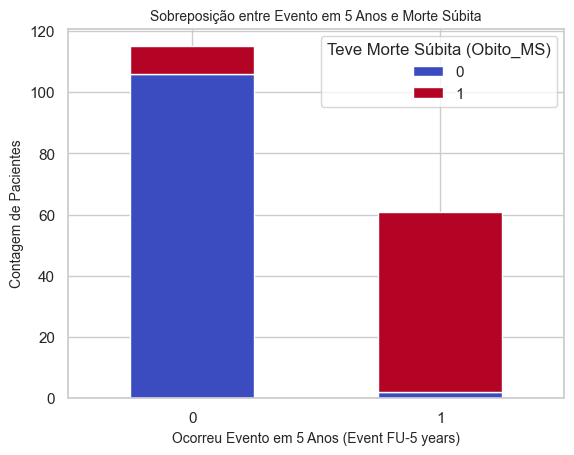

In [8]:
print("\nAnálise: 'Event (FU-5 years)' vs 'Obito_MS'")
# Tabela de contingência para ver a sobreposição
crosstab_event_obito = pd.crosstab(df['Event (FU-5 years)'], df['Obito_MS'])
print("Tabela de Contingência:")
print(crosstab_event_obito)

crosstab_event_obito.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Sobreposição entre Evento em 5 Anos e Morte Súbita', fontsize=10)
plt.xlabel('Ocorreu Evento em 5 Anos (Event FU-5 years)', fontsize=10)
plt.ylabel('Contagem de Pacientes', fontsize=10)
plt.xticks(rotation=0)
plt.legend(title='Teve Morte Súbita (Obito_MS)')
plt.show()


Gráfico de Dispersão para Rassi Points


C:\Users\adria\AppData\Local\Temp\ipykernel_40108\1348716156.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Obito_MS', y='Rassi Points', data=df, jitter=True, alpha=0.7, palette='viridis')


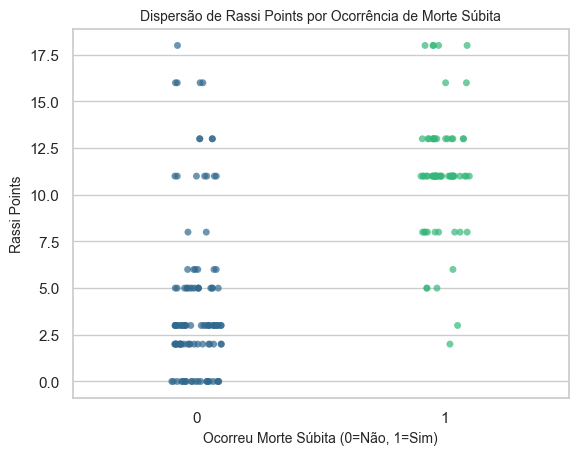

In [9]:
print("\nGráfico de Dispersão para Rassi Points")
plt.figure()
    
sns.stripplot(x='Obito_MS', y='Rassi Points', data=df, jitter=True, alpha=0.7, palette='viridis')
    
plt.title('Dispersão de Rassi Points por Ocorrência de Morte Súbita', fontsize=10)
plt.xlabel('Ocorreu Morte Súbita (0=Não, 1=Sim)', fontsize=10)
plt.ylabel('Rassi Points', fontsize=10)
plt.show()


Gráfico de Dispersão para Fração de Ejeção (FE)


C:\Users\adria\AppData\Local\Temp\ipykernel_40108\1969270547.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Obito_MS', y='FE', data=df, jitter=True, alpha=0.7, palette='plasma')


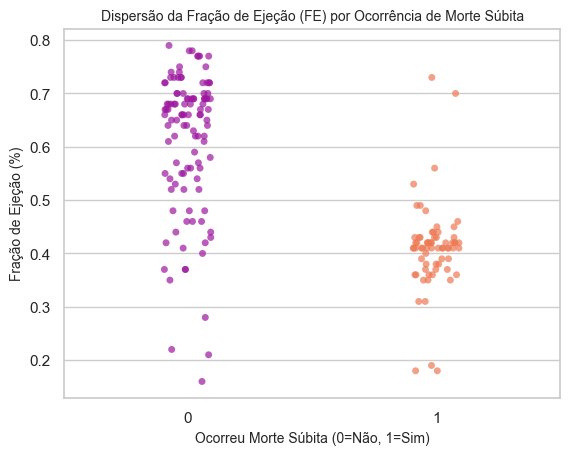

In [10]:
print("Gráfico de Dispersão para Fração de Ejeção (FE)")
plt.figure()
    
sns.stripplot(x='Obito_MS', y='FE', data=df, jitter=True, alpha=0.7, palette='plasma')
    
plt.title('Dispersão da Fração de Ejeção (FE) por Ocorrência de Morte Súbita', fontsize=10)
plt.xlabel('Ocorreu Morte Súbita (0=Não, 1=Sim)', fontsize=10)
plt.ylabel('Fração de Ejeção (%)', fontsize=10)
plt.show()


Idade e Morte Súbita


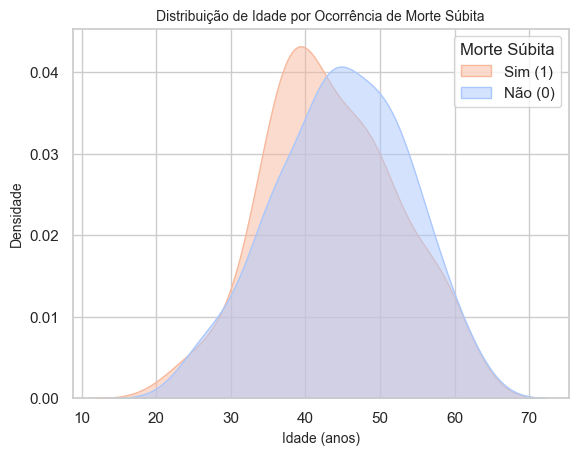

In [11]:
print("\nIdade e Morte Súbita")
plt.figure()

sns.kdeplot(data=df, x='Age', hue='Obito_MS', fill=True, common_norm=False, palette='coolwarm', alpha=0.5)
plt.title('Distribuição de Idade por Ocorrência de Morte Súbita', fontsize=10)
plt.xlabel('Idade (anos)', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.legend(title='Morte Súbita', labels=['Sim (1)', 'Não (0)'])
plt.show()


Distribuição da Classe de Fração de Ejeção
Distribuição da Classe_FE:
Classe_FE
0    84
2    64
1    19
3     9
Name: count, dtype: int64


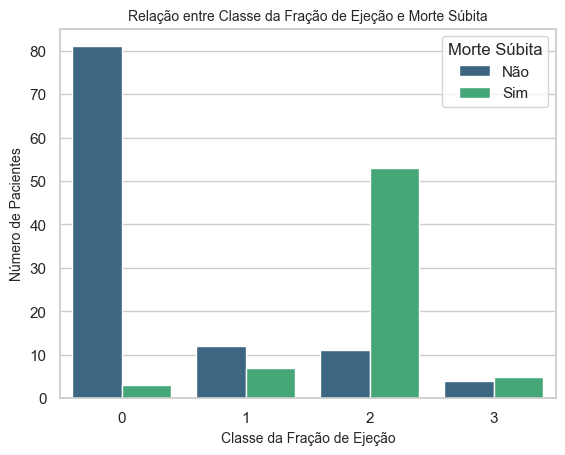

In [12]:
print("\nDistribuição da Classe de Fração de Ejeção")
print("Distribuição da Classe_FE:")
print(df['Classe_FE'].value_counts())

plt.figure()
sns.countplot(data=df, x='Classe_FE', hue='Obito_MS', palette='viridis')
plt.title('Relação entre Classe da Fração de Ejeção e Morte Súbita', fontsize=10)
plt.xlabel('Classe da Fração de Ejeção', fontsize=10)
plt.ylabel('Número de Pacientes', fontsize=10)
plt.legend(title='Morte Súbita', labels=['Não', 'Sim'])
plt.show()


Análise de Interação: FE, Morte Súbita e Sexo


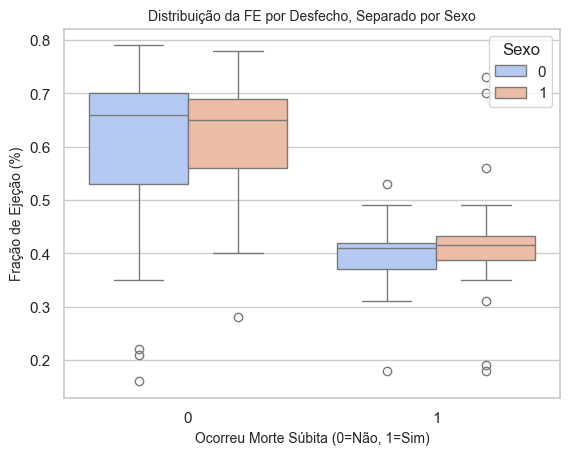

In [13]:
print("\nAnálise de Interação: FE, Morte Súbita e Sexo")
plt.figure()
sns.boxplot(data=df, x='Obito_MS', y='FE', hue='Sex', palette='coolwarm')
plt.title('Distribuição da FE por Desfecho, Separado por Sexo', fontsize=10)
plt.xlabel('Ocorreu Morte Súbita (0=Não, 1=Sim)', fontsize=10)
plt.ylabel('Fração de Ejeção (%)', fontsize=10)
plt.legend(title='Sexo')
plt.show()


Features mais Correlacionadas


C:\Users\adria\AppData\Local\Temp\ipykernel_40108\277754260.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='BuPu')


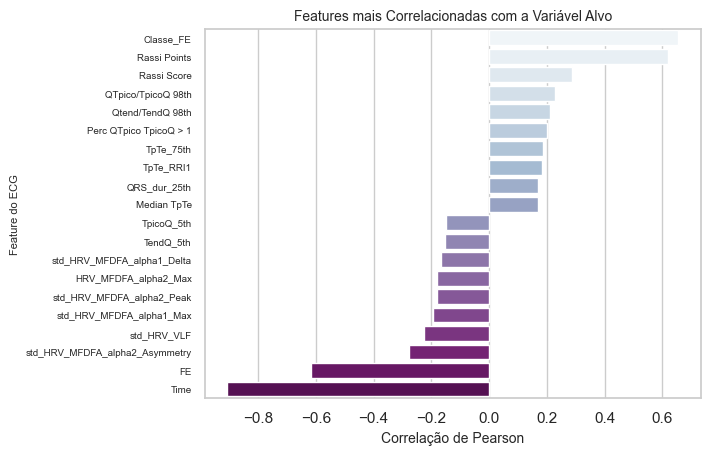

In [14]:
print("\nFeatures mais Correlacionadas")
# Selecionando apenas colunas numéricas
df_numeric = df.select_dtypes(include=np.number)

# Calculando correlação com a variável alvo
corr_com_alvo = df_numeric.corr()['Obito_MS_FU-5 years'].sort_values(ascending=False)

# Removendo a correlação da própria variável e outras relacionadas ao desfecho
corr_com_alvo = corr_com_alvo.drop(['Obito_MS', 'Obito_MS_FU-5 years', 'Event (FU-5 years)'], errors='ignore')

# Top 10 features com correlação positiva e negativa
top_positivas = corr_com_alvo.head(10)
top_negativas = corr_com_alvo.tail(10)

# Concatenando para plotar
top_features = pd.concat([top_positivas, top_negativas])

plt.figure()
sns.barplot(x=top_features.values, y=top_features.index, palette='BuPu')
plt.title('Features mais Correlacionadas com a Variável Alvo', fontsize=10)
plt.xlabel('Correlação de Pearson', fontsize=10)
plt.ylabel('Feature do ECG', fontsize=8)
plt.tick_params(axis='y', labelsize=7)
plt.show()

In [15]:
print(df['Rassi Points'].unique()) 
print(df['Classe_FE'].unique())

[ 2 11  8  5 13  3 18  6  0 16]
[0 2 1 3]


## Análise de Sensibilidade do Modelo
#### Testar diferentes limiares de horizonte

In [16]:
#pacientes que tiveram morte subita cardiaca
pacientes_com_msc = df[df['Obito_MS'] == 1].copy()
total_pacientes_msc = len(pacientes_com_msc)
total_pacientes_msc

68

#### Até 1 ano

In [17]:
condicao_1 = (pacientes_com_msc['Time'] < 1)
pacientes_ano_1 = pacientes_com_msc[condicao_1]
contagem_1 = len(pacientes_ano_1)
contagem_1

29

#### Até 2 anos

In [18]:
condicao_2 = (pacientes_com_msc['Time'] < 2)
pacientes_ano_2 = pacientes_com_msc[condicao_2]
contagem_2 = len(pacientes_ano_2)
contagem_2

45

#### Até 3 anos

In [19]:
condicao_3 = (pacientes_com_msc['Time'] < 3)
pacientes_ano_3 = pacientes_com_msc[condicao_3]
contagem_3 = len(pacientes_ano_3)
contagem_3

53

#### Até 4 anos

In [20]:
condicao_4 = (pacientes_com_msc['Time'] < 4)
pacientes_ano_4 = pacientes_com_msc[condicao_4]
contagem_4 = len(pacientes_ano_4)
contagem_4

56

#### Até 5 anos

In [21]:
condicao_5 = (pacientes_com_msc['Time'] < 5)
pacientes_ano_5 = pacientes_com_msc[condicao_5]
contagem_5 = len(pacientes_ano_5)
contagem_5

59

#### Igual ou acima de 5 anos

In [22]:
condicao_5mais = (pacientes_com_msc['Time'] == 5)
pacientes_ano_5mais = pacientes_com_msc[condicao_5mais]
contagem_5mais = len(pacientes_ano_5mais)

print(f"Número de pacientes com MSC exatamente em 5 ou mais anos: {contagem_5mais}")

if contagem_5mais > 0:
    print("\nLista de Nomes:")
    print(pacientes_ano_5mais['Name'])
else:
    print("\nNenhum paciente encontrado com essa condição.")

Número de pacientes com MSC exatamente em 5 ou mais anos: 9

Lista de Nomes:
6               Altino Gomes Santiago
14        Antônio Figueiredo de Matos
16           Antônio Nunes dos Santos
43                 Evaldo B. Siqueira
49              Geralda Maria Andrade
111    Maria da Conceição Souza Moura
142               Nilda Rosa de Jesus
160         Sebastião Sales de Araújo
162            Sebastião Souza Santos
Name: Name, dtype: object


* 6               Altino Gomes Santiago (10 anos)
* 14        Antônio Figueiredo de Matos (10 anos)
* 16        Antônio Nunes dos Santos    ( 7 anos)
* 43                 Evaldo B. Siqueira (13 anos)
* 49              Geralda Maria Andrade ( 9 anos)
* 111    Maria da Conceição Souza Moura (5 anos)
* 142               Nilda Rosa de Jesus (20 anos)
* 160         Sebastião Sales de Araújo ( 9 anos)
* 162            Sebastião Souza Santos ( 5 anos)

In [28]:
df_3 = pd.read_excel("dados/chagas_limiar_3_anos.xlsx")
print("\nAnálise: Distribuição das Classes")
print(df_3['Target_FU_3_Anos'].value_counts())
df_3.columns


Análise: Distribuição das Classes
Target_FU_3_Anos
0    124
1     52
Name: count, dtype: int64


Index(['ID', 'Name', 'Filename', 'Date Holter', 'Time', 'Data_MSC_Extraida',
       'Time_Calculado_Anos', 'Sex', 'Nat', 'Event (FU-5 years)',
       ...
       'std_HRV_ShanEn', 'std_HRV_FuzzyEn', 'std_HRV_MSEn', 'std_HRV_CMSEn',
       'std_HRV_RCMSEn', 'std_HRV_CD', 'std_HRV_HFD', 'std_HRV_KFD',
       'std_HRV_LZC', 'Target_FU_3_Anos'],
      dtype='object', length=257)

In [24]:
df_5 = pd.read_excel("dados/chagas_limiar_5_anos.xlsx")
print("\nAnálise: Distribuição das Classes")
print(df_5['Target_FU_5_Anos'].value_counts())


Análise: Distribuição das Classes
Target_FU_5_Anos
0    118
1     58
Name: count, dtype: int64


In [25]:
df_7 = pd.read_excel("dados/chagas_limiar_7_anos.xlsx")
print("\nAnálise: Distribuição das Classes")
print(df_7['Target_FU_7_Anos'].value_counts())


Análise: Distribuição das Classes
Target_FU_7_Anos
0    116
1     60
Name: count, dtype: int64


In [26]:
df_10 = pd.read_excel("dados/chagas_limiar_10_anos.xlsx")
print("\nAnálise: Distribuição das Classes")
print(df_10['Target_FU_10_Anos'].value_counts())


Análise: Distribuição das Classes
Target_FU_10_Anos
0    110
1     66
Name: count, dtype: int64
